In [37]:
library(tidyverse)

In [47]:
file <- read_csv("http://data.insideairbnb.com/canada/qc/quebec-city/2019-11-07/data/listings.csv.gz")

airbnb_df <- subset(file, select = -c(summary, space, listing_url, host_url, description, scrape_id, last_scraped, experiences_offered, 
                                      thumbnail_url, medium_url, xl_picture_url, host_acceptance_rate, name, neighbourhood, 
                                      neighborhood_overview, neighbourhood_group_cleansed, host_neighbourhood, jurisdiction_names, 
                                      license, cancellation_policy, notes, transit, access, interaction, house_rules, picture_url, host_about, 
                                      host_thumbnail_url, host_total_listings_count, minimum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, maximum_minimum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, host_picture_url))

#removing '$' from price and fees and converting from string to numeric
airbnb_df$price = as.numeric(gsub("\\$", "", airbnb_df$price)) 
airbnb_df$weekly_price = as.numeric(gsub("\\$", "", airbnb_df$weekly_price))
airbnb_df$monthly_price = as.numeric(gsub("\\$", "", airbnb_df$monthly_price))
airbnb_df$cleaning_fee = as.numeric(gsub("\\$", "", airbnb_df$cleaning_fee))
airbnb_df$security_deposit = as.numeric(gsub("\\$", "", airbnb_df$security_deposit))

Parsed with column specification:
cols(
  .default = col_character(),
  id = col_double(),
  scrape_id = col_double(),
  last_scraped = col_date(format = ""),
  thumbnail_url = col_logical(),
  medium_url = col_logical(),
  xl_picture_url = col_logical(),
  host_id = col_double(),
  host_since = col_date(format = ""),
  host_is_superhost = col_logical(),
  host_listings_count = col_double(),
  host_total_listings_count = col_double(),
  host_has_profile_pic = col_logical(),
  host_identity_verified = col_logical(),
  neighbourhood = col_logical(),
  neighbourhood_group_cleansed = col_logical(),
  latitude = col_double(),
  longitude = col_double(),
  is_location_exact = col_logical(),
  accommodates = col_double(),
  bathrooms = col_double()
  # ... with 40 more columns
)

See spec(...) for full column specifications.



In [48]:
summary(airbnb_df)

       id              host_id           host_name           host_since        
 Min.   :   54334   Min.   :   254811   Length:2704        Min.   :2010-10-06  
 1st Qu.:18589259   1st Qu.: 29506103   Class :character   1st Qu.:2015-03-26  
 Median :27903475   Median : 90335665   Mode  :character   Median :2016-08-17  
 Mean   :25784162   Mean   :114600153                      Mean   :2016-08-25  
 3rd Qu.:34839724   3rd Qu.:194055805                      3rd Qu.:2018-06-07  
 Max.   :39942561   Max.   :307893148                      Max.   :2019-11-07  
                                                                               
 host_location      host_response_time host_response_rate host_is_superhost
 Length:2704        Length:2704        Length:2704        Mode :logical    
 Class :character   Class :character   Class :character   FALSE:1897       
 Mode  :character   Mode  :character   Mode  :character   TRUE :807        
                                                        

In [55]:
#finding the names of all columns and their data type
sapply(airbnb_df, class)

id 
                                   "numeric" 
                                     host_id 
                                   "numeric" 
                                   host_name 
                                 "character" 
                                  host_since 
                                      "Date" 
                               host_location 
                                 "character" 
                          host_response_time 
                                 "character" 
                          host_response_rate 
                                 "character" 
                           host_is_superhost 
                                   "logical" 
                         host_listings_count 
                                   "numeric" 
                          host_verifications 
                                 "character" 
                        host_has_profile_pic 
                                   "logical" 
                      host_identity_verified 
                                   "logical" 
                                      street 
                                 "character" 
                      neighbourhood_cleansed 
                                 "character" 
                                        city 
                                 "character" 
                                       state 
                                 "character" 
                                     zipcode 
                                 "character" 
                                      market 
                                 "character" 
                              smart_location 
                                 "character" 
                                country_code 
                                 "character" 
                                     country 
                                 "character" 
                                    latitude 
                                   "numeric" 
                                   longitude 
                                   "numeric" 
                           is_location_exact 
                                   "logical" 
                               property_type 
                                 "character" 
                                   room_type 
                                 "character" 
                                accommodates 
                                   "numeric" 
                                   bathrooms 
                                   "numeric" 
                                    bedrooms 
                                   "numeric" 
                                        beds 
                                   "numeric" 
                                    bed_type 
                                 "character" 
                                   amenities 
                                 "character" 
                                 square_feet 
                                   "numeric" 
                                       price 
                                   "numeric" 
                                weekly_price 
                                   "numeric" 
                               monthly_price 
                                   "numeric" 
                            security_deposit 
                                   "numeric" 
                                cleaning_fee 
                                   "numeric" 
                             guests_included 
                                   "numeric" 
                                extra_people 
                                 "character" 
                              minimum_nights 
                                   "numeric" 
                              maximum_nights 
                                   "numeric" 
                            calendar_updated 
                                 "character" 
                            has_availability 
                                   "logi

In [54]:
data.frame(unclass(summary(airbnb_df)), check.names = FALSE, stringsAsFactors = FALSE)

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,...,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
X,Min. : 54334,Min. : 254811,Length:2704,Min. :2010-10-06,Length:2704,Length:2704,Length:2704,Mode :logical,Min. : 0.000,Length:2704,...,Mode :logical,Mode :logical,Mode :logical,Mode :logical,Mode :logical,Min. : 1.000,Min. : 0.000,Min. : 0.0000,Min. :0.000000,Min. : 0.020
X.1,1st Qu.:18589259,1st Qu.: 29506103,Class :character,1st Qu.:2015-03-26,Class :character,Class :character,Class :character,FALSE:1897,1st Qu.: 1.000,Class :character,...,FALSE:2704,FALSE:1080,FALSE:2704,FALSE:2692,FALSE:2694,1st Qu.: 1.000,1st Qu.: 1.000,1st Qu.: 0.0000,1st Qu.:0.000000,1st Qu.: 0.840
X.2,Median :27903475,Median : 90335665,Mode :character,Median :2016-08-17,Mode :character,Mode :character,Mode :character,TRUE :807,Median : 2.000,Mode :character,...,NA,TRUE :1624,NA,TRUE :12,TRUE :10,Median : 2.000,Median : 1.000,Median : 0.0000,Median :0.000000,Median : 2.530
X.3,Mean :25784162,Mean :114600153,NA,Mean :2016-08-25,NA,NA,NA,NA,Mean : 7.168,NA,...,NA,NA,NA,NA,NA,Mean : 5.175,Mean : 4.452,Mean : 0.6967,Mean :0.009985,Mean : 3.176
X.4,3rd Qu.:34839724,3rd Qu.:194055805,NA,3rd Qu.:2018-06-07,NA,NA,NA,NA,3rd Qu.: 5.000,NA,...,NA,NA,NA,NA,NA,3rd Qu.: 4.000,3rd Qu.: 3.000,3rd Qu.: 1.0000,3rd Qu.:0.000000,3rd Qu.: 4.945
X.5,Max. :39942561,Max. :307893148,NA,Max. :2019-11-07,NA,NA,NA,NA,Max. :148.000,NA,...,NA,NA,NA,NA,NA,Max. :50.000,Max. :50.000,Max. :18.0000,Max. :2.000000,Max. :13.640
X.6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA's :354


## Scatterplot Matrices for select numeric variables of interest

In [6]:
#airbnb_df['host_listings_count']==airbnb_df['host_total_listings_count']

In [7]:
options(repr.plot.width = 12, repr.plot.height = 9)

In [8]:
numeric_1 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[2:7]
numeric_1[1] = 'price'
numeric_subset1 <- airbnb_df[,numeric_1]

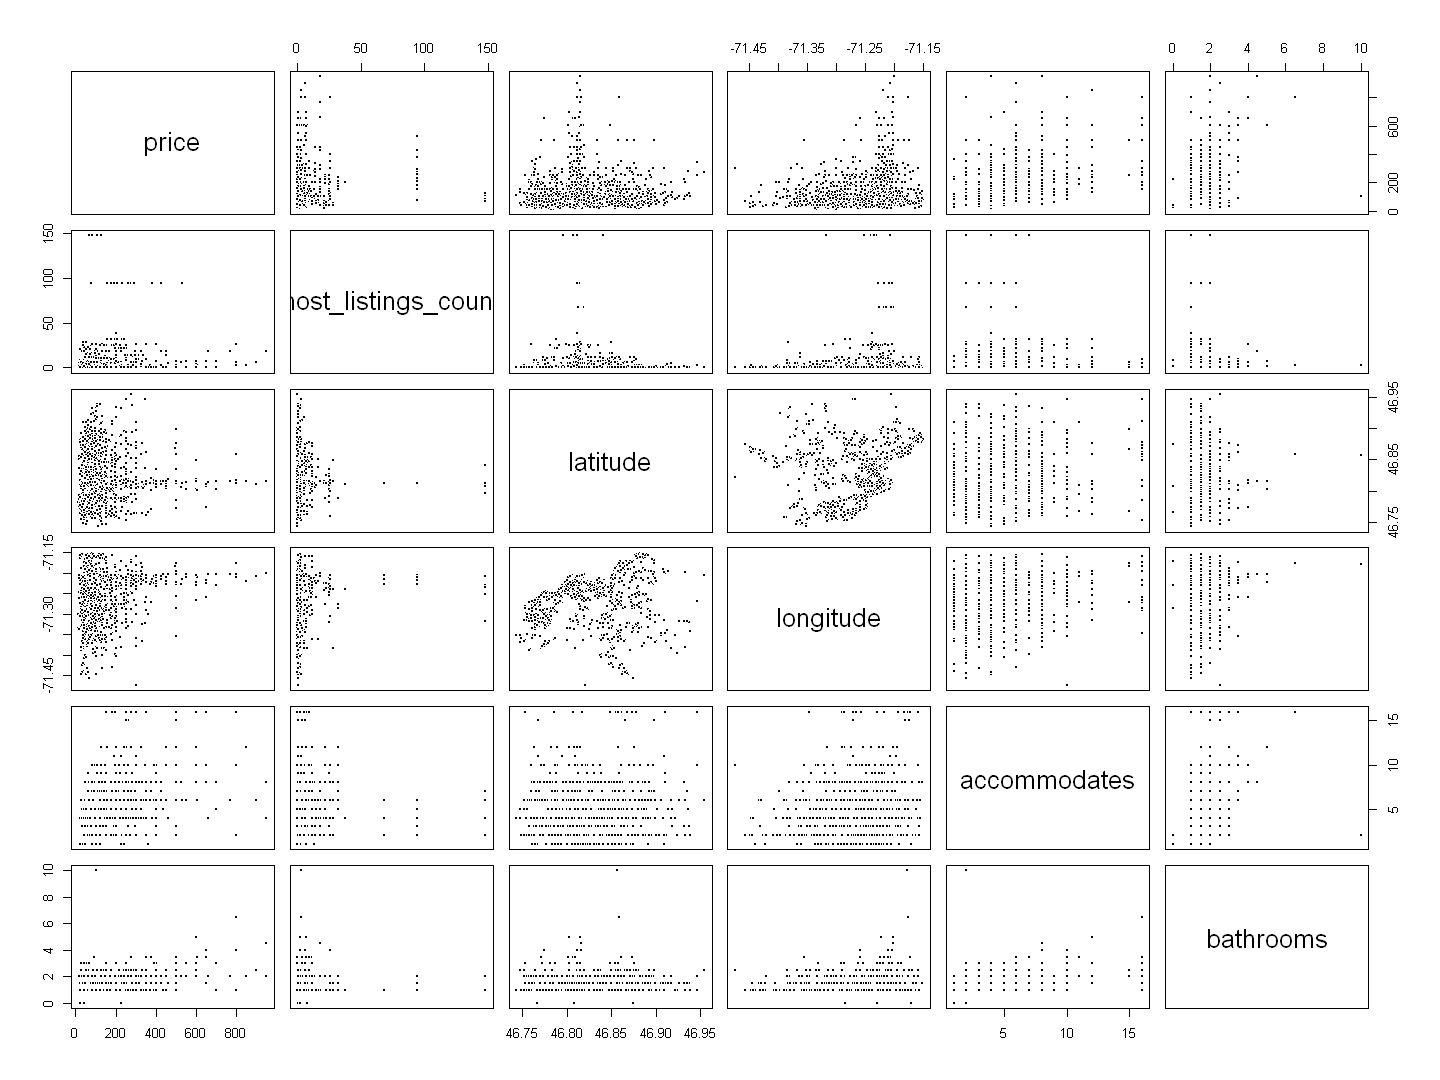

In [49]:
#plot_1  <- airbnb_df[,c('price','host_listings_count','latitude','longitude','accommodates','bathrooms')]
pairs(numeric_subset1,pch = 21,cex = 0.7,bg="black",col="white",lwd= 0.5, cex.labels=2)

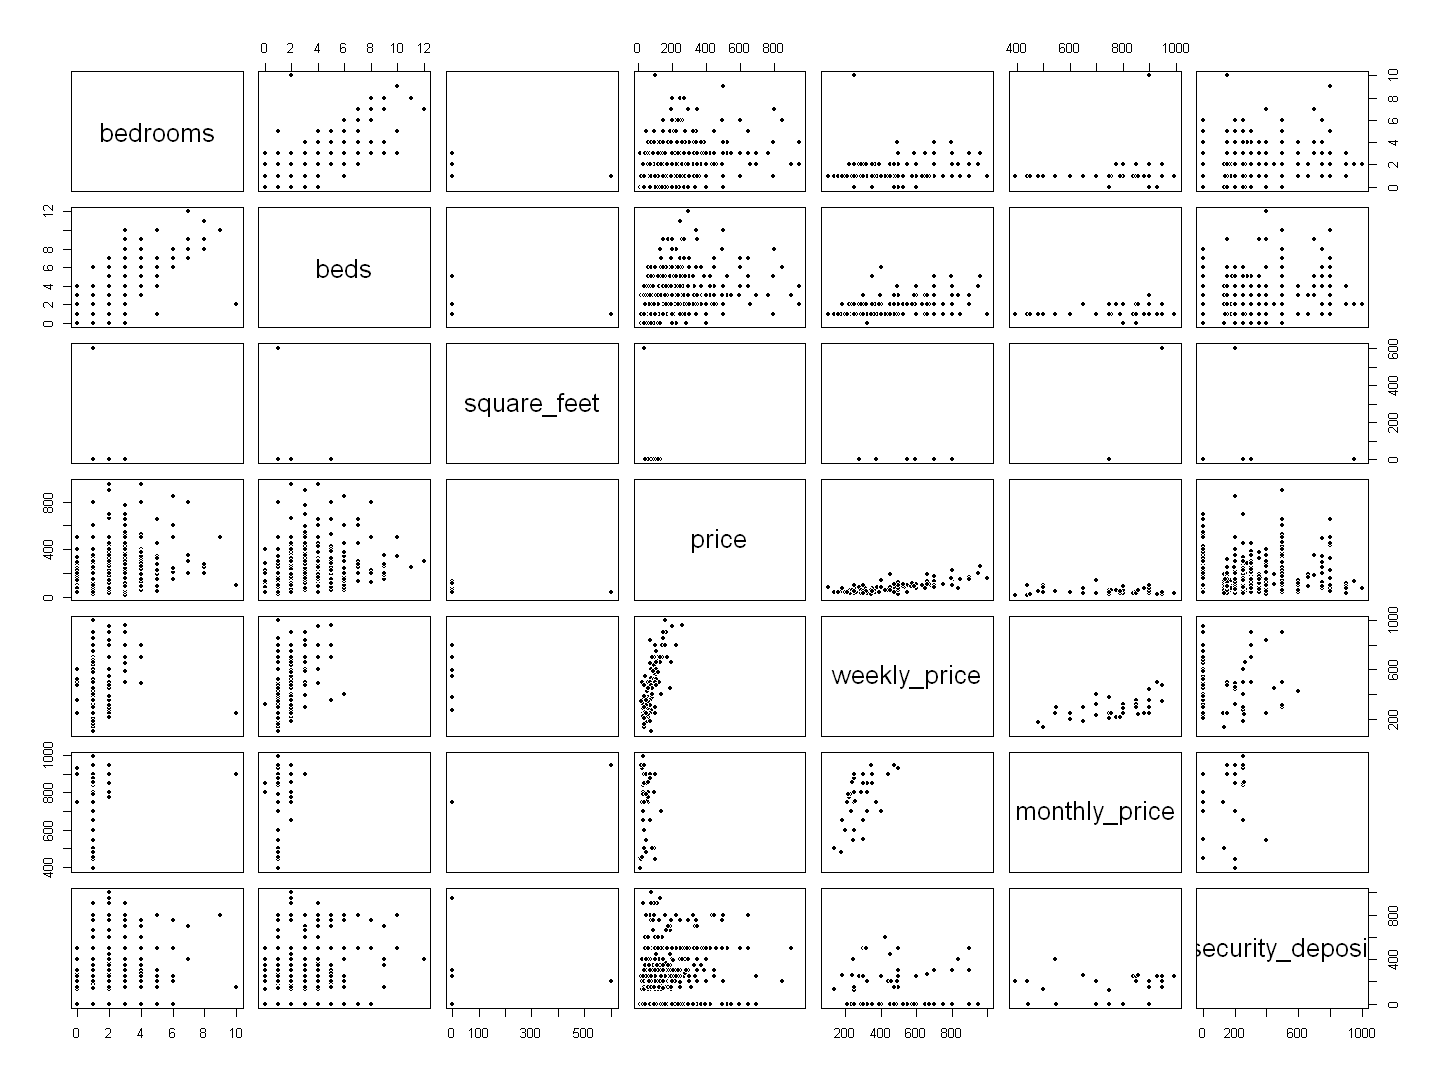

In [10]:
numeric_subset2 <- airbnb_df[,colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[8:14]]
pairs(numeric_subset2,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

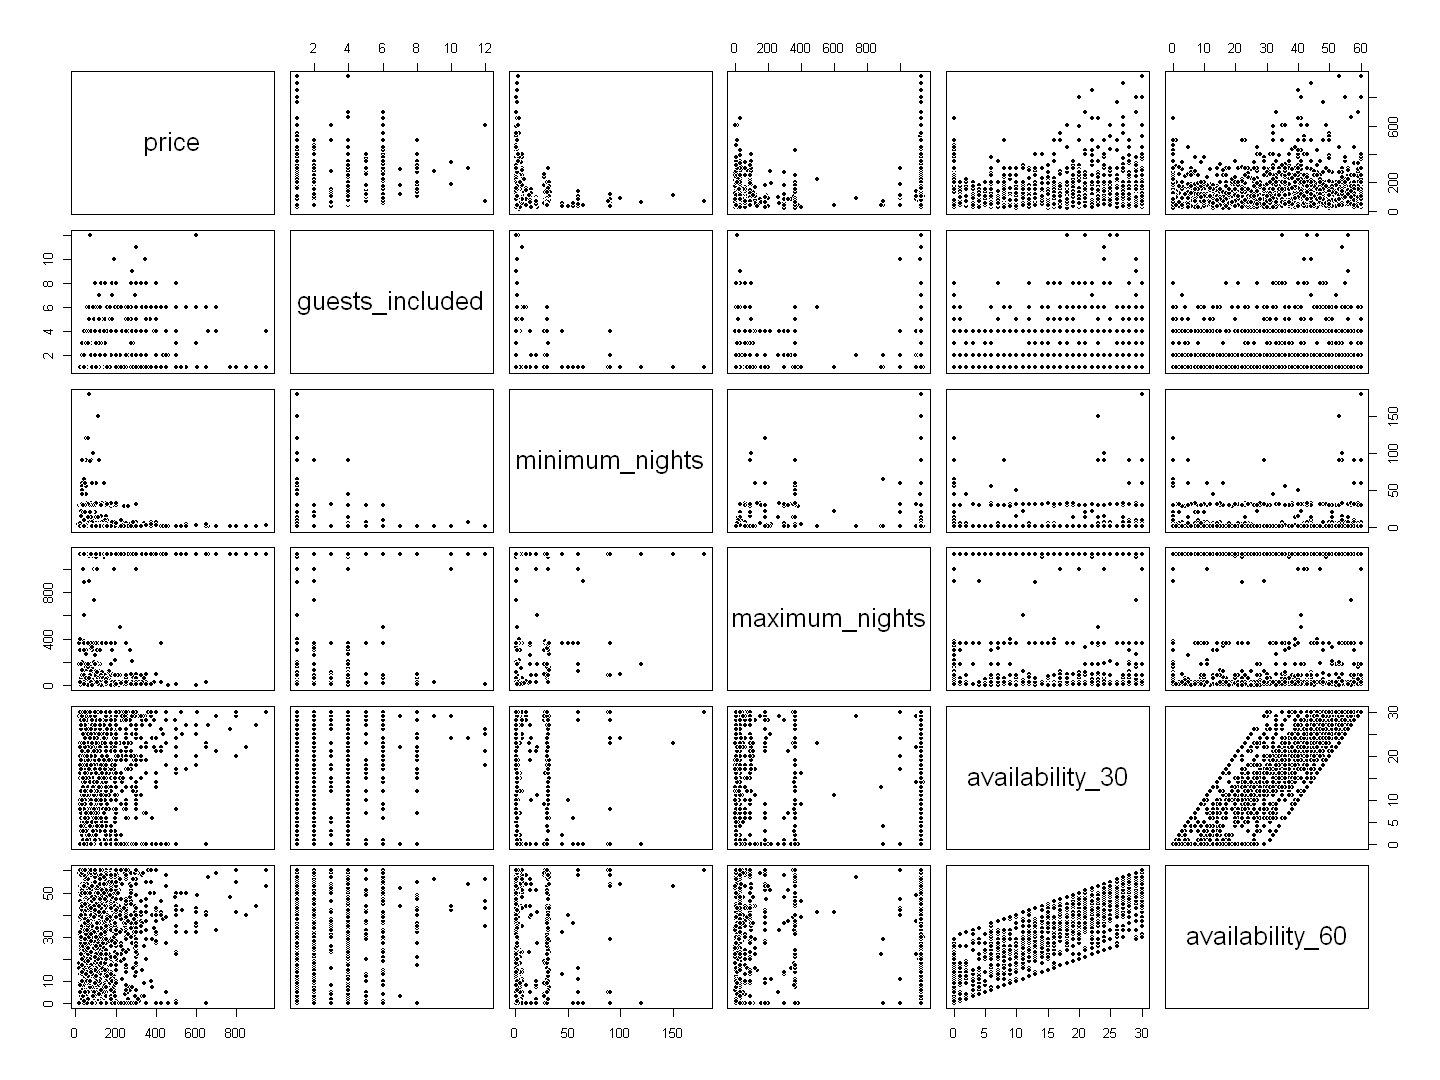

In [11]:
numeric_3 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[15:20]
numeric_3[1] = 'price'
numeric_subset3 <- airbnb_df[,numeric_3]

pairs(numeric_subset3,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

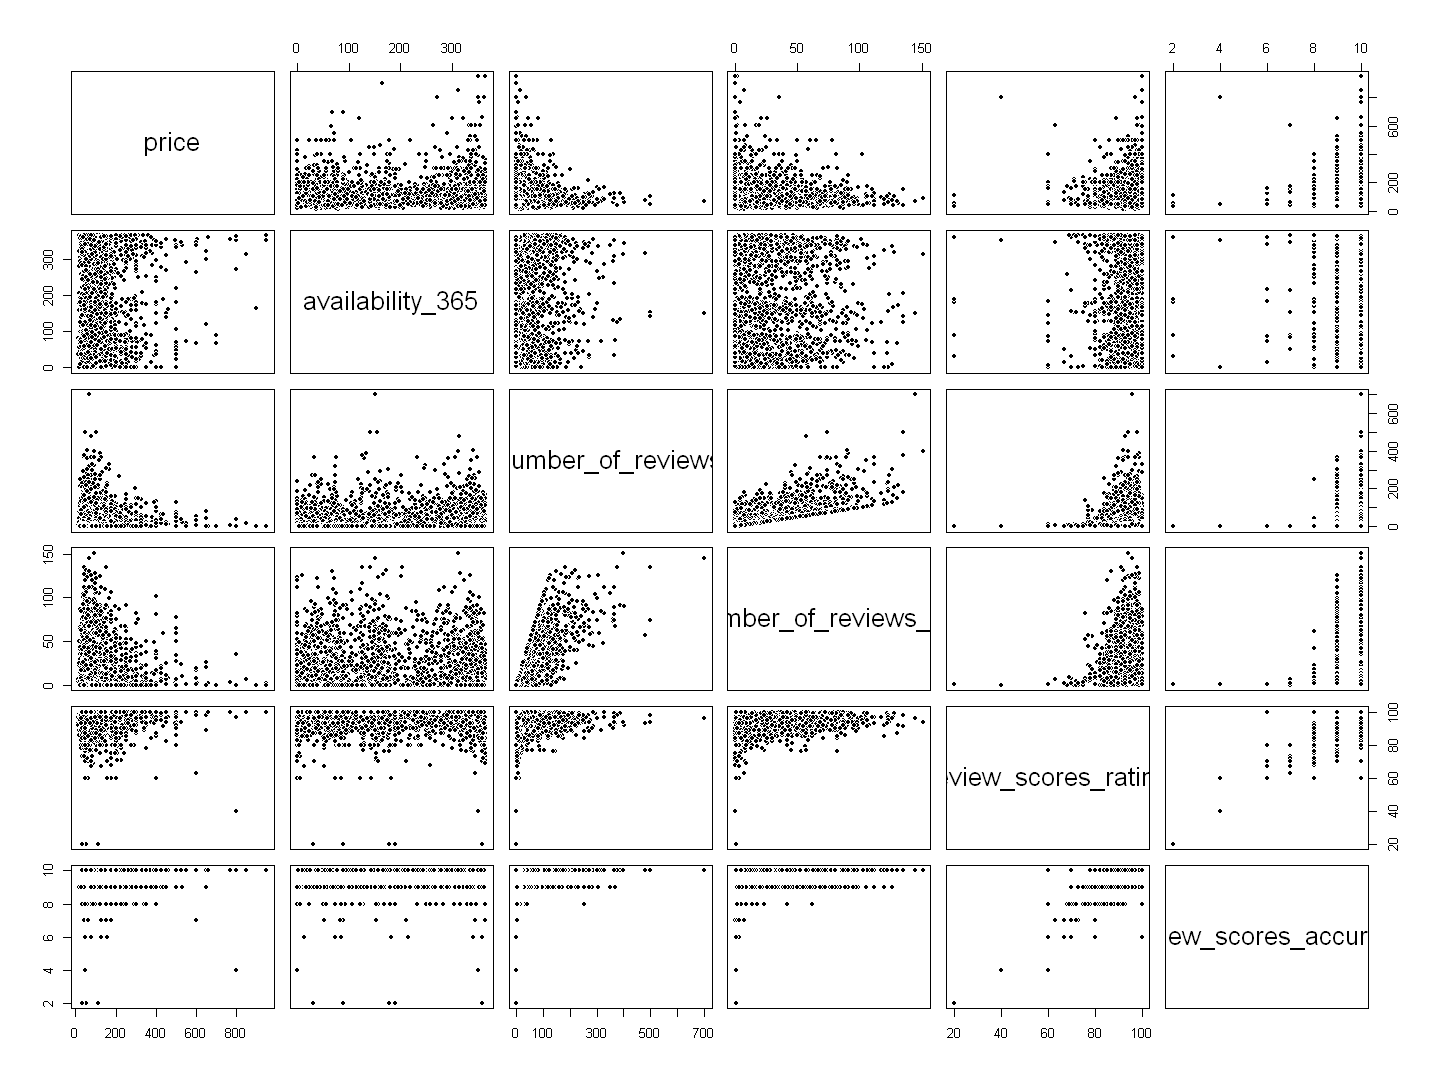

In [12]:
numeric_4 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[21:26]
numeric_4[1] = 'price'
numeric_subset4 <- airbnb_df[,numeric_4]
pairs(numeric_subset4,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

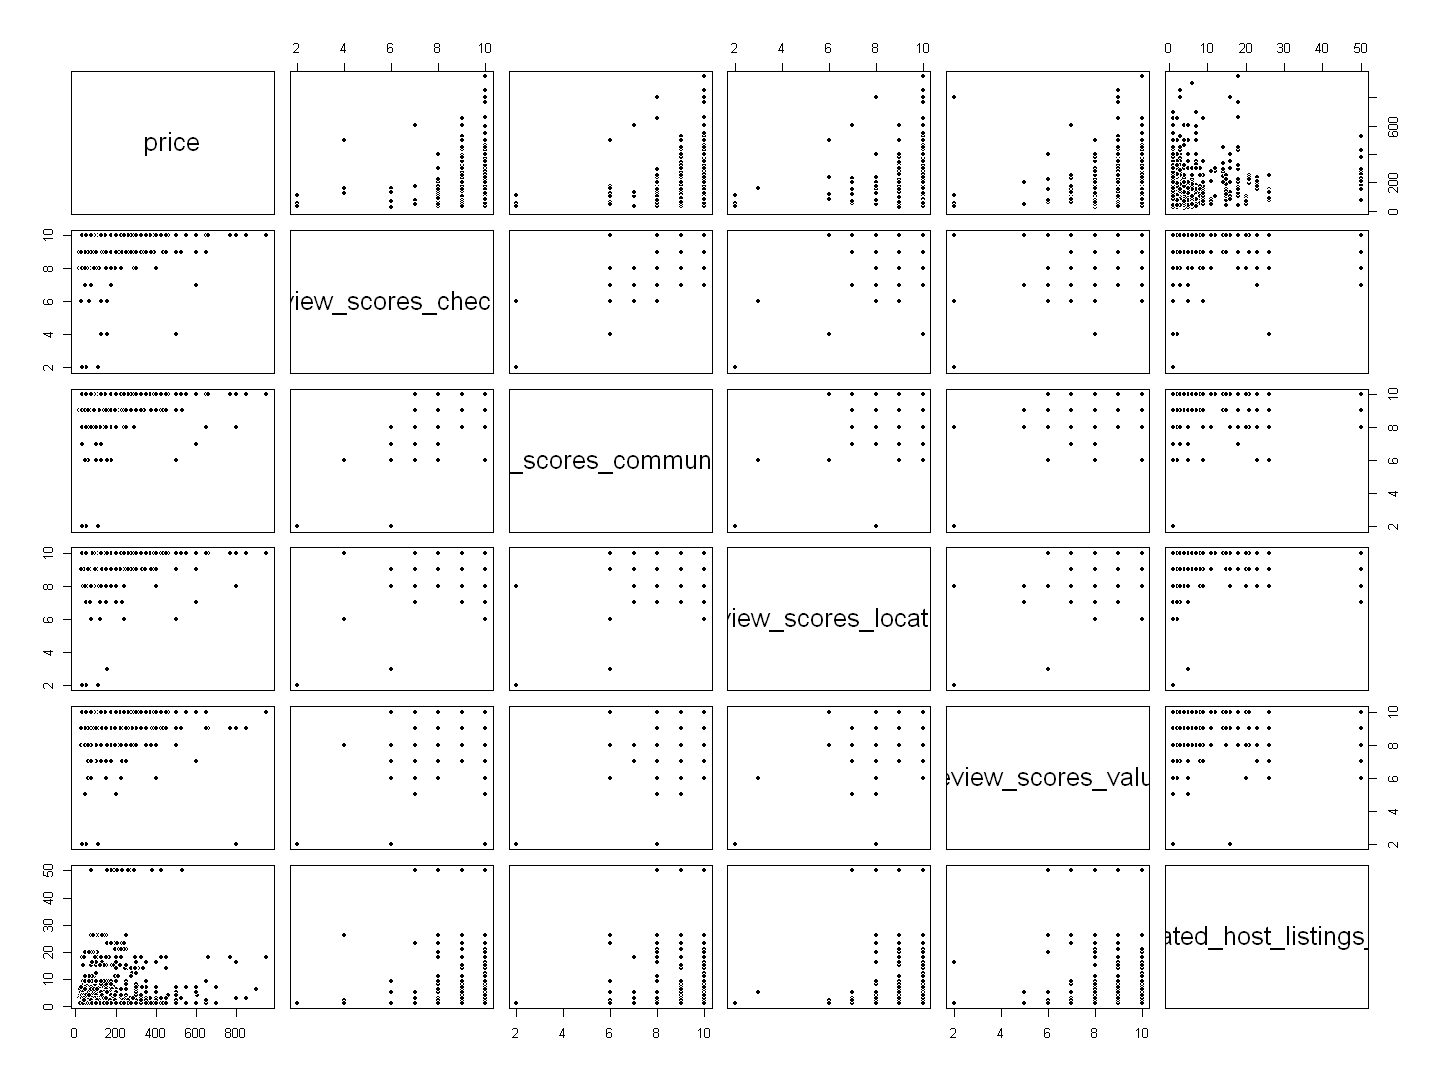

In [13]:
numeric_5 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[27:32]
numeric_5[1] = 'price'
numeric_subset5 <- airbnb_df[,numeric_5]
pairs(numeric_subset5,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

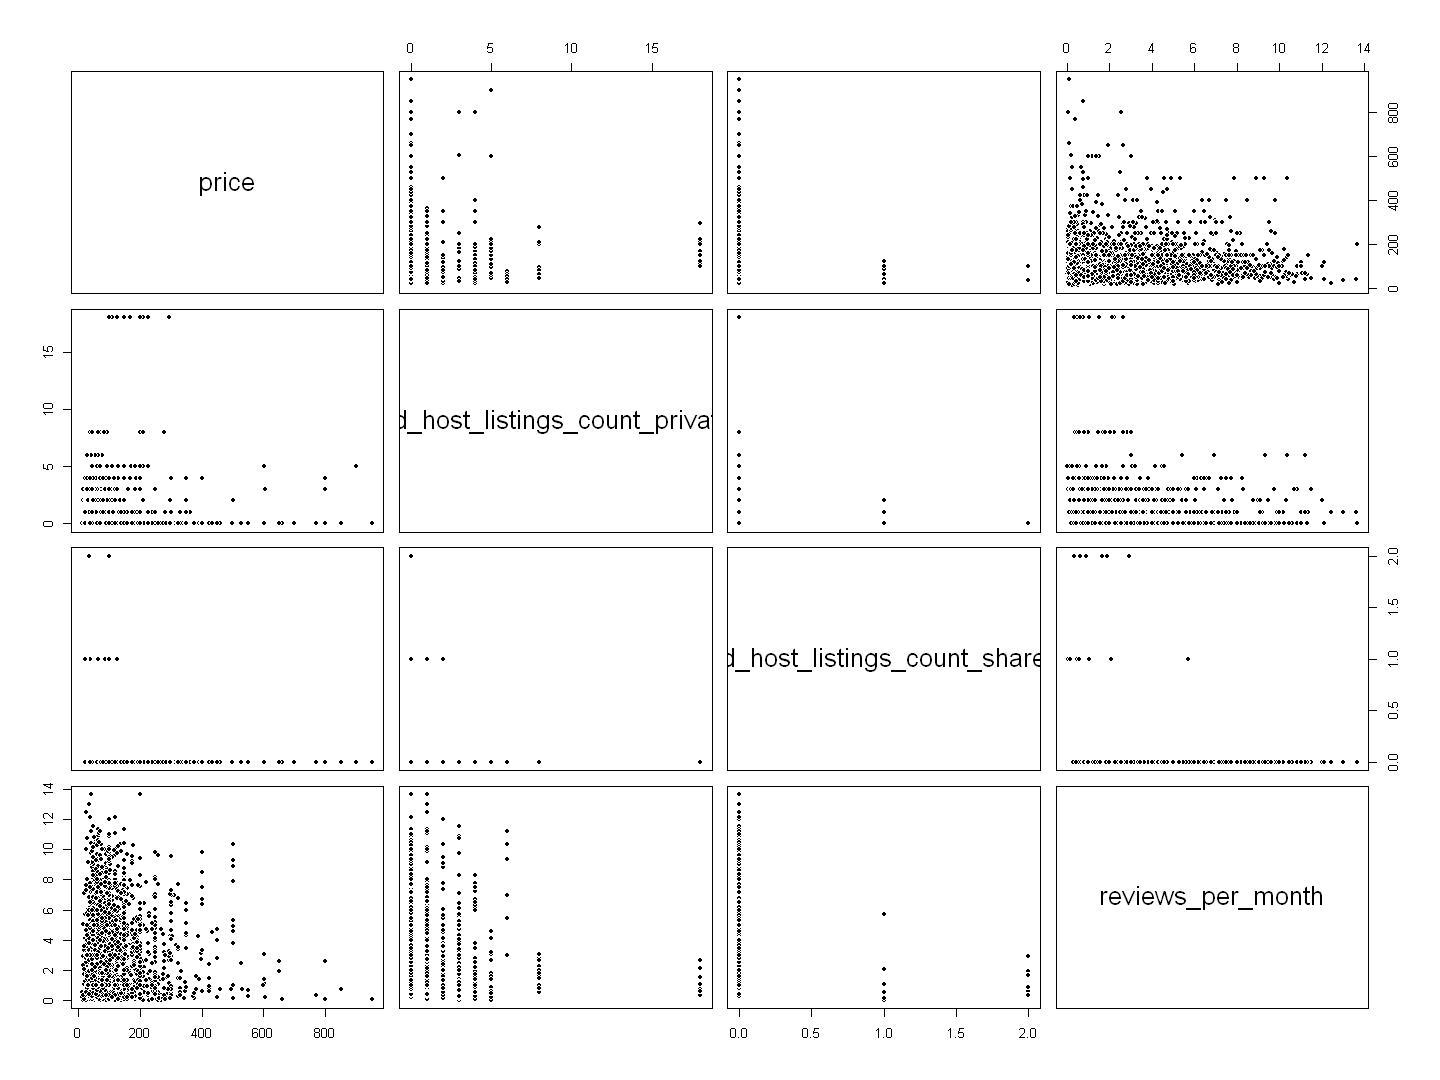

In [14]:
numeric_6 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[33:36]
numeric_6[1] = 'price'
numeric_subset6 <- airbnb_df[,numeric_6]

pairs(numeric_subset6,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

In [15]:
#Todo

#Count of property type, room type, barplot
#ggpairs() warnings are annoying
#Remove NAs. 

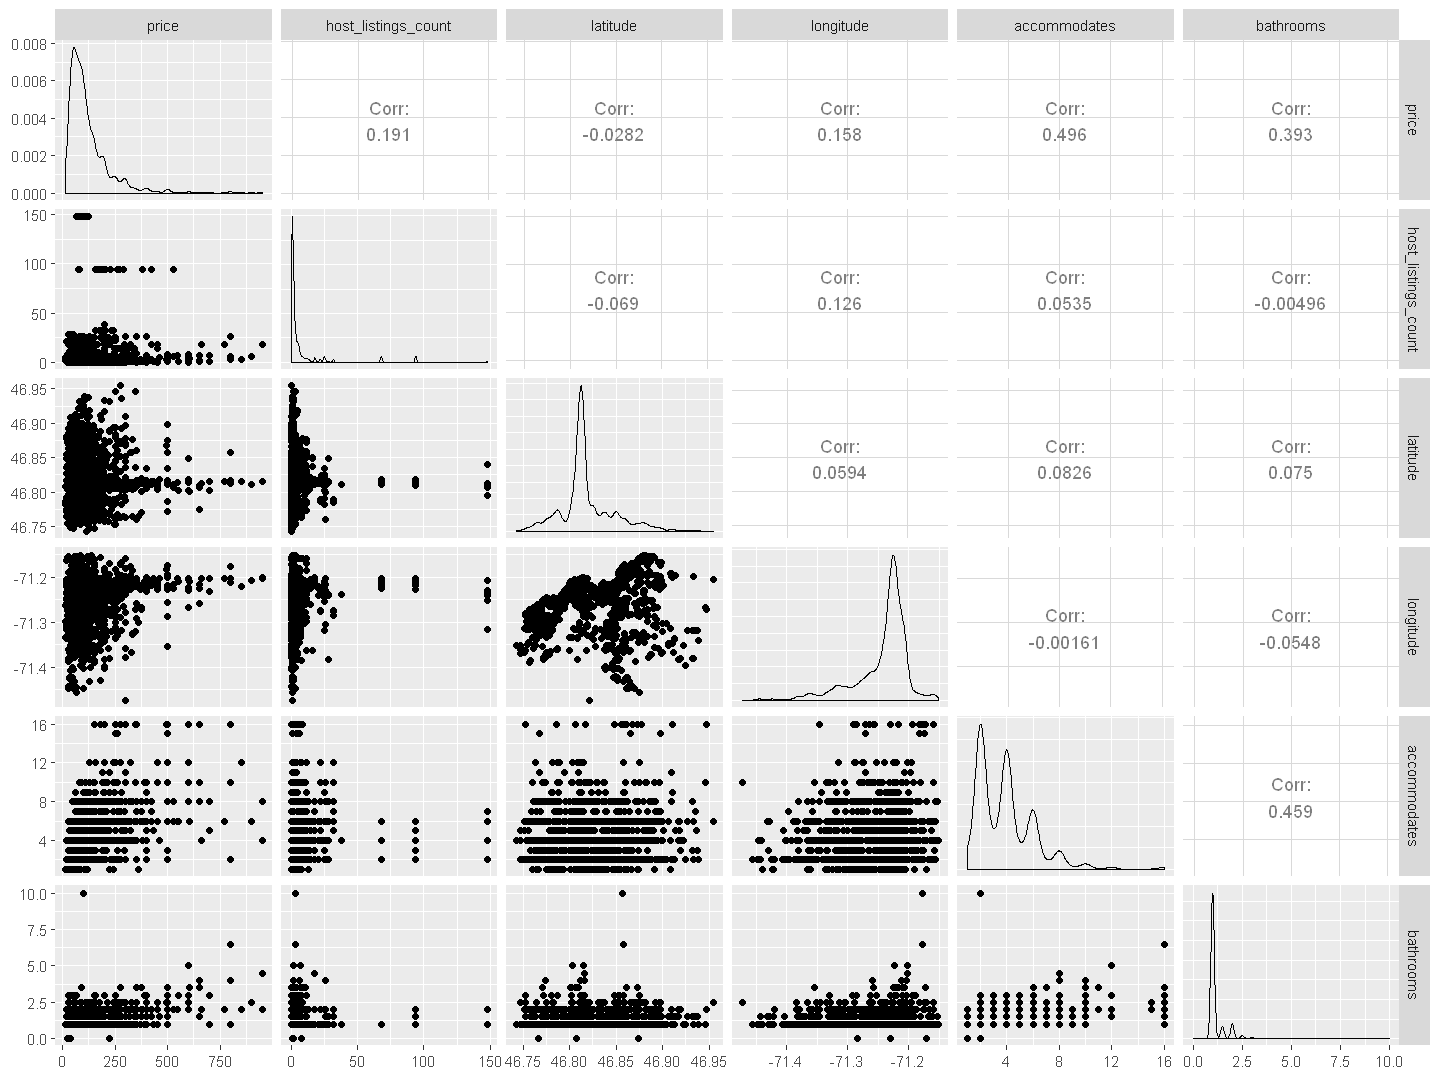

In [38]:
library(GGally)

numeric_subset1 %>% 
    ggpairs(na.rm = TRUE)%>%
    print(progress = F)

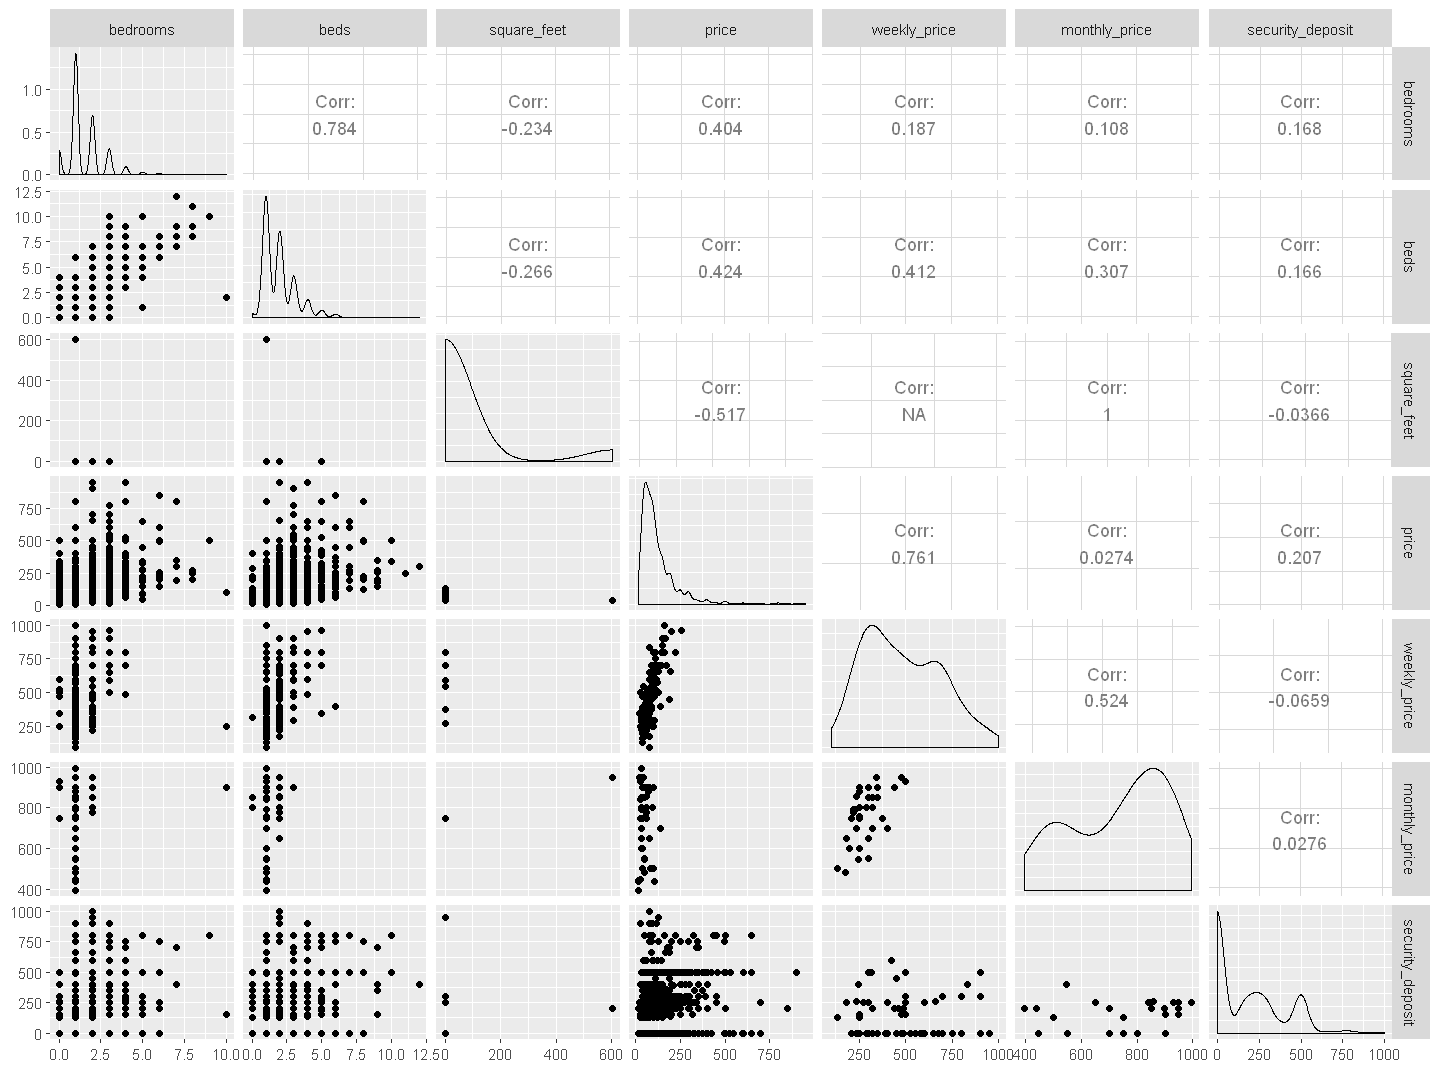

In [39]:
numeric_subset2 %>%
    ggpairs(na.rm = TRUE)%>%
    print(progress = F)

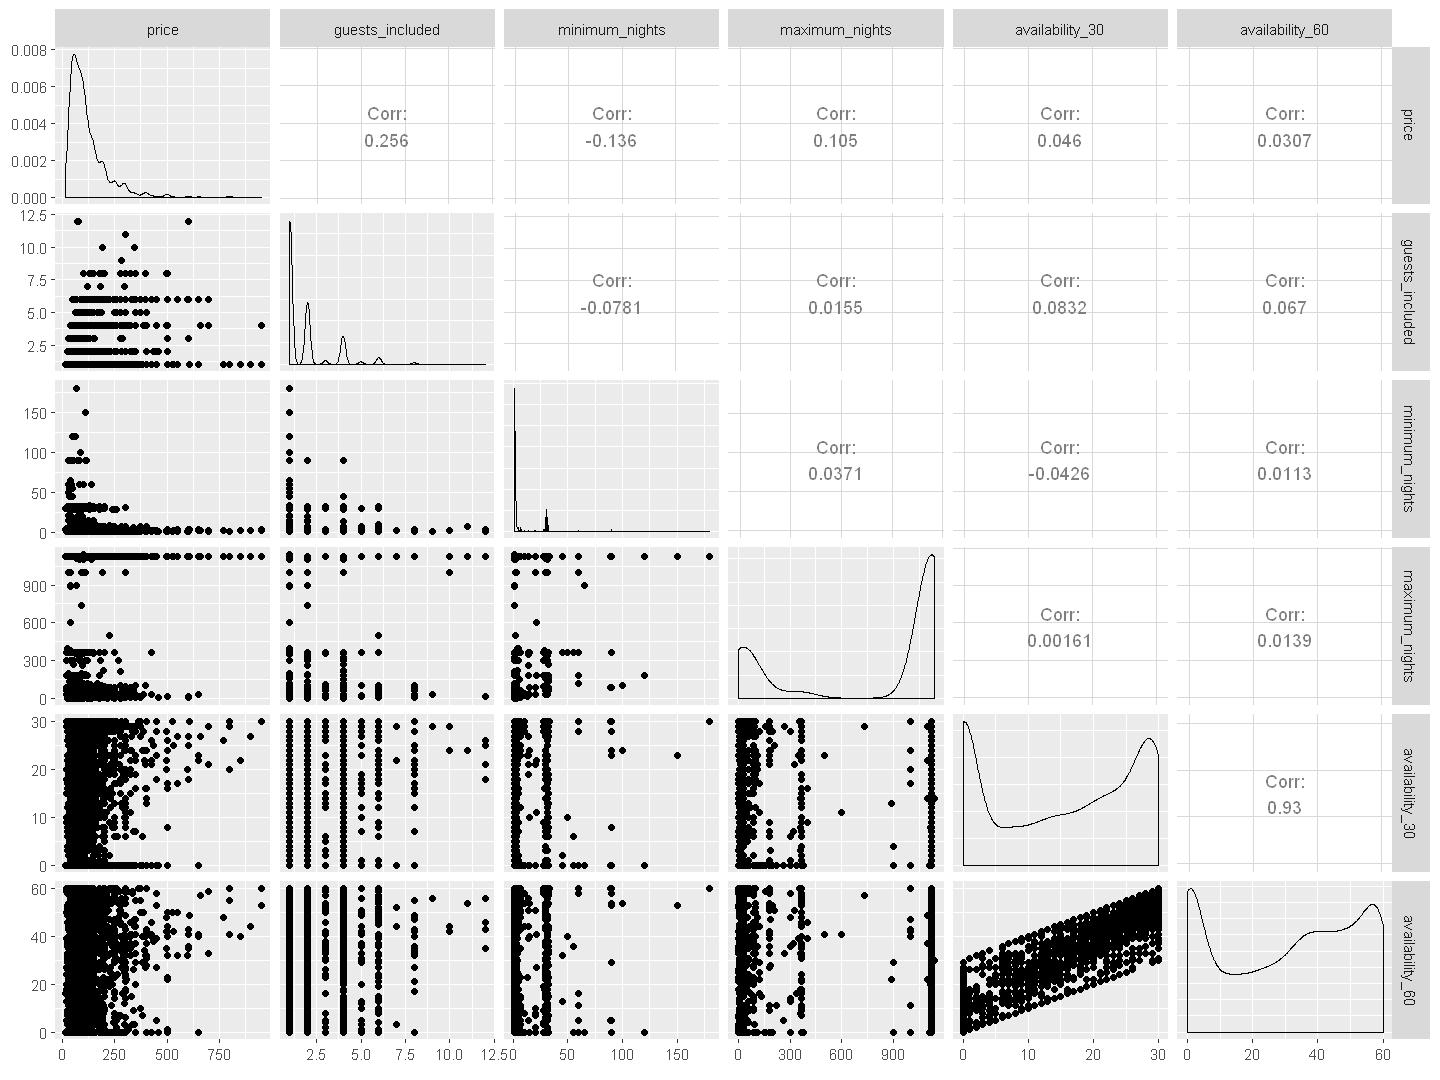

In [40]:
numeric_subset3 %>%
    ggpairs(na.rm = TRUE)%>%
    print(progress = F)

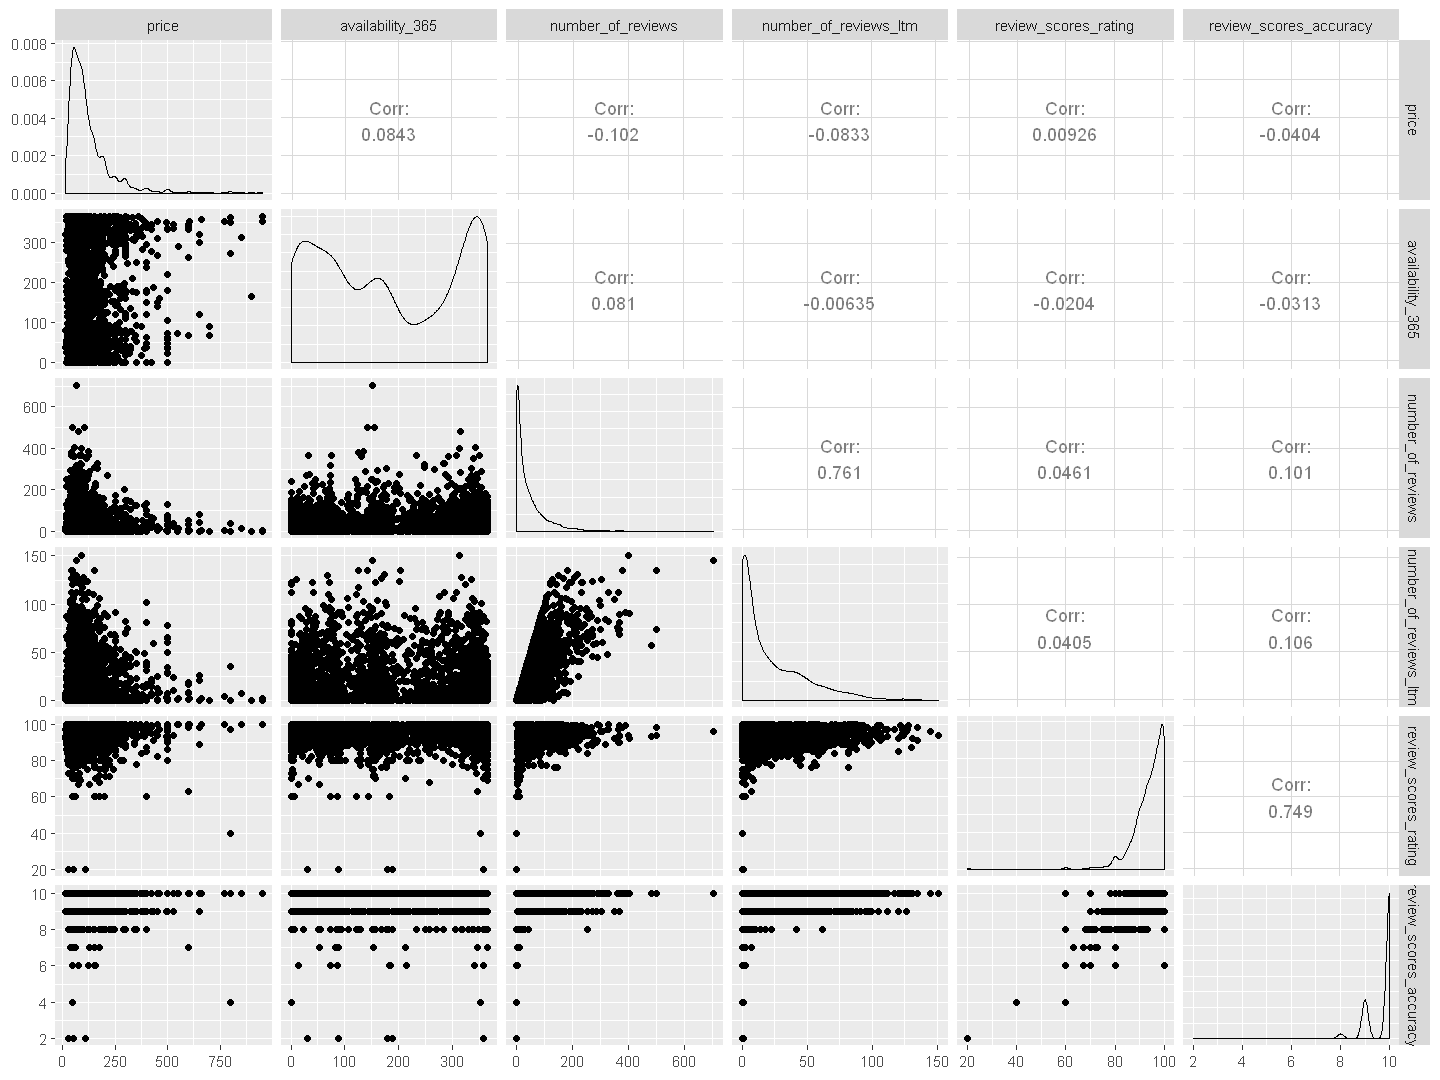

In [41]:
numeric_subset4 %>%
    ggpairs(na.rm = TRUE)%>%
    print(progress = F)

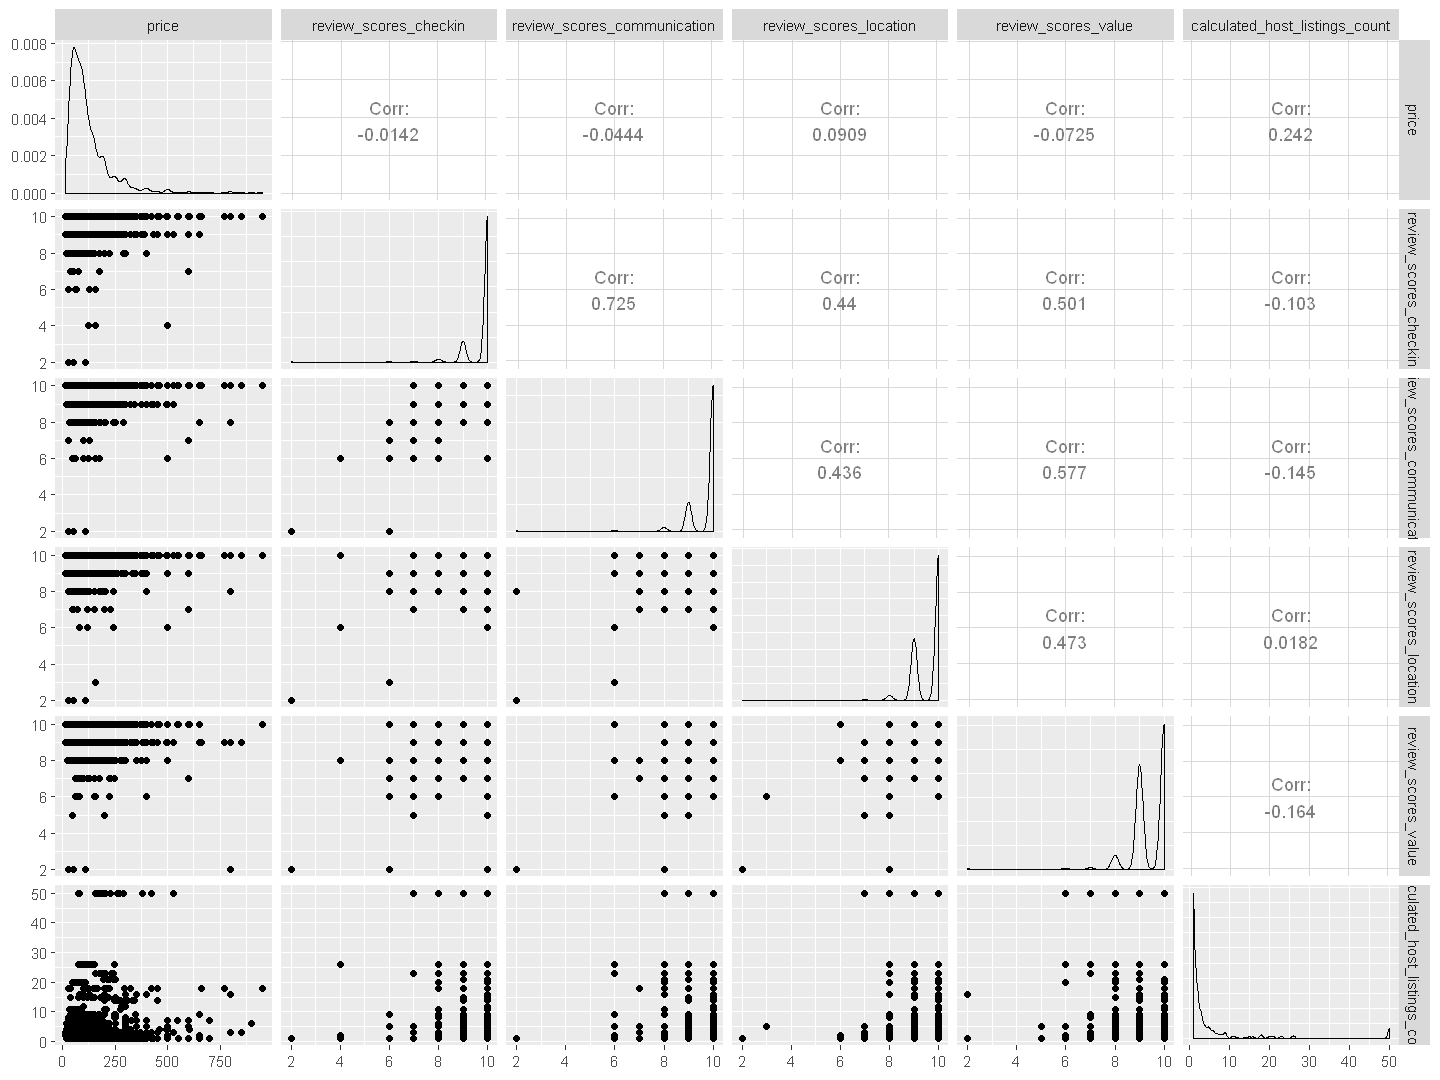

In [42]:
numeric_subset5 %>%
    ggpairs(na.rm = TRUE)%>%
    print(progress = F)

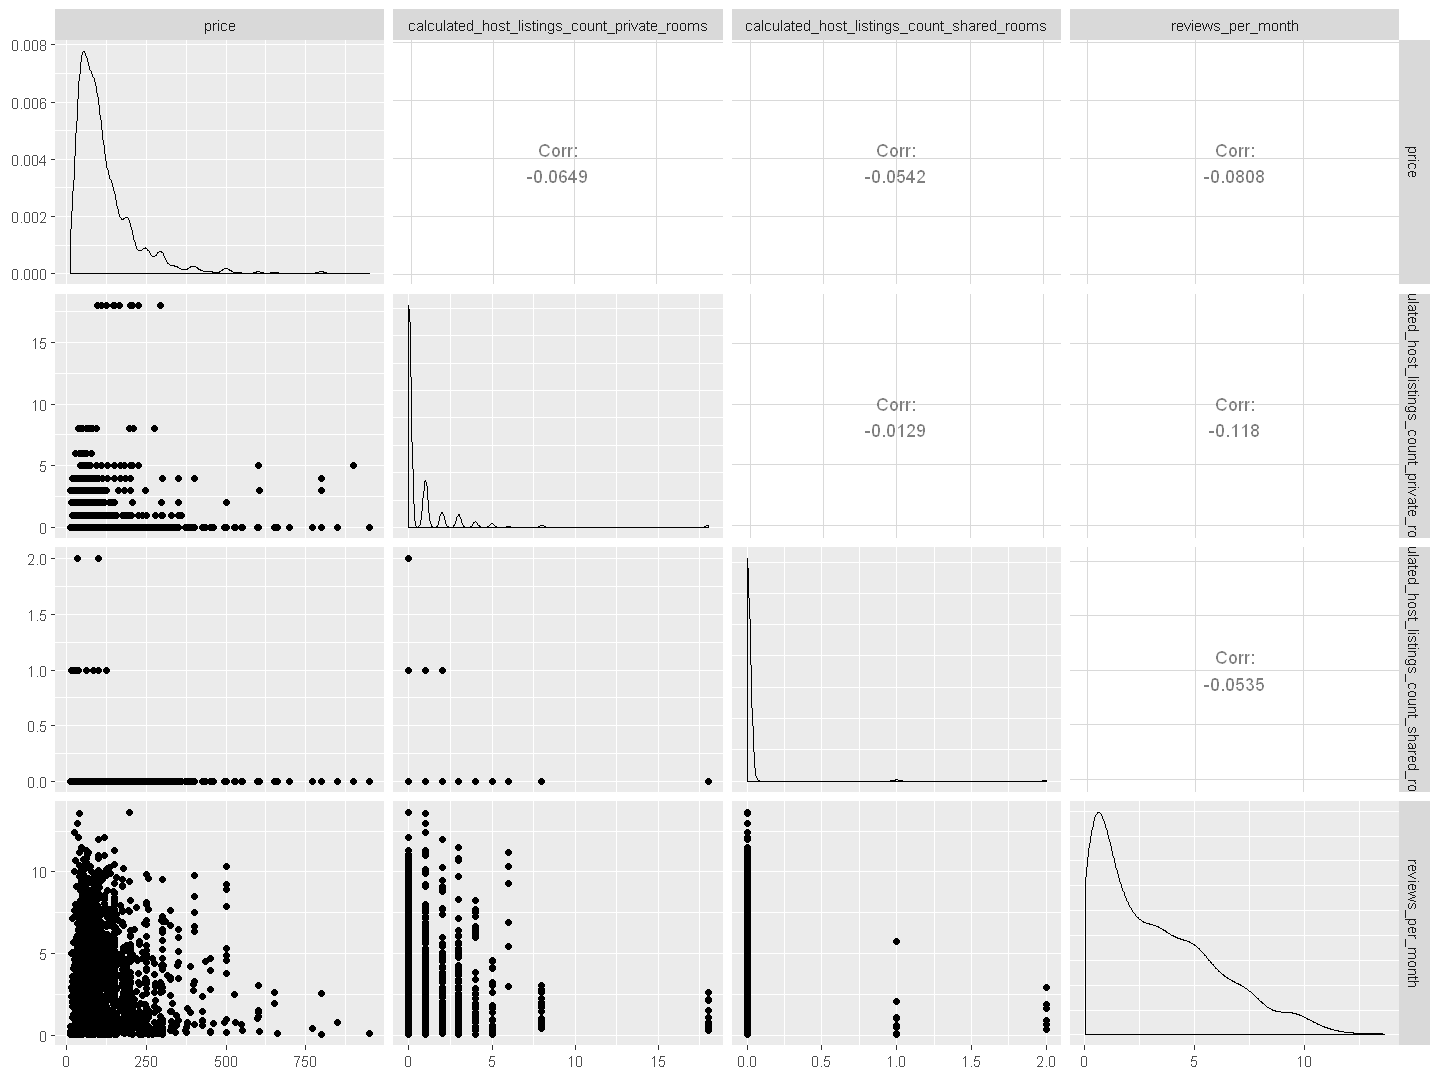

In [43]:
numeric_subset6 %>%
    ggpairs(na.rm = TRUE)%>%
    print(progress = F)